In [92]:
# !pip install tensorflow
# !pip install matplotlib
# !pip install sklearn
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 

In [93]:
# !pip install opencv-python
import os
import cv2
import numpy as np
# load train and test dataset
# def load_dataset():

images = []
trainX = []
trainY = []
testX = []
testY = []
numberOfEach = [0] * 10
for i in range(0, 10):
    folder = str(i) + '/'
    files = os.listdir(folder)
    for f in range(0, len(files)):
        numberOfEach[i] += 1
        filename = files[f]
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_UNCHANGED)
        if img is not None:
            if(f > int(len(files)/9)):
                trainX.append(img)
                trainY.append(i)
            else:
                testX.append(img)
                testY.append(i)
                
# this is bad data, we are saving it as -1
folder = 'BadData/'
files = os.listdir(folder)
draftX = []
for f in range(0, len(files)):
    filename = files[f]
    if f == 16:
        print(filename)
    img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_UNCHANGED)
    if img is not None:
            draftX.append(img)

trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)

# added late, fix up the drafting
draftX = np.array(draftX)
draftX = draftX.reshape((draftX.shape[0], 16, 16, 1))
draftX = draftX.astype('float32')
draftX = draftX / 255.0

print(trainX.shape)
print(trainY.shape)
print(draftX.shape)

print('Number Train: {} Number Test: {}'.format(len(trainX), len(testX)))
print(numberOfEach)
print(np.sum(numberOfEach))

EGvsBOOM31.png
(8429, 16, 16)
(8429,)
(48, 16, 16, 1)
Number Train: 8429 Number Test: 1060
[1896, 1812, 1004, 1064, 416, 845, 685, 813, 298, 656]
9489


In [94]:
# print(trainX[0])
# print(testX[0])

# return
# # load dataset

def load_dataset(trainX, trainY, testX, testY):
    print(trainX.shape)
    print(trainY.shape)
    
    # # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 16, 16, 1))
    testX = testX.reshape((testX.shape[0], 16, 16, 1))
    # # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

def load_dataset1(trainX, trainY, testX, testY):
    print(trainX.shape)
    print(trainY.shape)

    # # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

(trainX1, trainY1), (testX1, testY1) = mnist.load_data()
print("loaded from mnist")
print(trainX1.shape)
print(trainY1.shape)
trainX1, trainY1, testX1, testY1 = load_dataset1(trainX1, trainY1, testX1, testY1)
print(trainX1.shape)
print(trainY1.shape)

print("\n\n")
trainX, trainY, testX, testY = load_dataset(trainX, trainY, testX, testY)
print(trainX.shape)
print(trainY.shape)

loaded from mnist
(60000, 28, 28)
(60000,)
(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)



(8429, 16, 16)
(8429,)
(8429, 16, 16, 1)
(8429, 10)


In [95]:
# convert from integers to floats
def prep_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
trainX, testX = prep_pixels(trainX, testX)

print(trainX.shape)
print(trainY.shape)
print("\n\n")


(8429, 16, 16, 1)
(8429, 10)





In [97]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(16, 16, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#     model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# sparse_categorical_crossentropy
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(16, 16, 1)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#     model.add(Dense(10, activation='softmax'))
#     # compile model
#     opt = SGD(learning_rate=0.01, momentum=0.9)
#     model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model
model = define_model()

In [98]:

# print(trainX[0])
print(testX1.shape)
print(trainY1.shape)
print(testX.shape)
print(trainY.shape)
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=1)
# model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=1)

(10000, 28, 28, 1)
(60000, 10)
(1060, 16, 16, 1)
(8429, 10)
Epoch 1/10
264/264 [==============================] - 2s 7ms/step - loss: 0.1188 - accuracy: 0.9665
Epoch 2/10
264/264 [==============================] - 2s 7ms/step - loss: 0.0050 - accuracy: 0.9992
Epoch 3/10
264/264 [==============================] - 2s 7ms/step - loss: 0.0035 - accuracy: 0.9996
Epoch 4/10
264/264 [==============================] - 2s 7ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 5/10
264/264 [==============================] - 2s 7ms/step - loss: 0.0027 - accuracy: 0.9996
Epoch 6/10
264/264 [==============================] - 2s 7ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 7/10
264/264 [==============================] - 2s 7ms/step - loss: 0.0026 - accuracy: 0.9996
Epoch 8/10
264/264 [==============================] - 2s 7ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 9/10
264/264 [==============================] - 2s 7ms/step - loss: 0.0023 - accuracy: 0.9996
Epoch 10/10
264/264 [===================

In [99]:
def evaluate_model(dataX, dataY, n_folds=5):

    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
    # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
#         print(acc)
        
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories
    
scores, histories = evaluate_model(trainX, trainY)


> 99.941
> 100.000
> 99.941
> 99.941
> 99.941


C:\Users\chpiper\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
C:\Users\chpiper\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


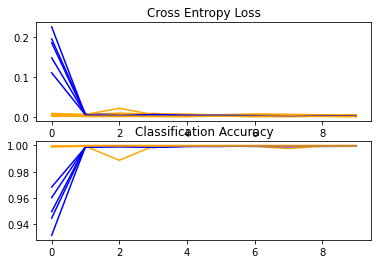

In [101]:
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()
    
summarize_diagnostics(histories)


Accuracy: mean=99.953 std=0.024, n=5


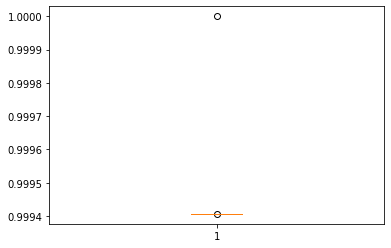

In [102]:
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()
summarize_performance(scores)

In [103]:
# calculate hte lowest confidence of all the highest confidences, also the highest of the second highest confidences
output = model.predict(testX)
maxVal = 10000
secondMaxVal = -1
for score in output:
    score[::-1].sort()
    if(score[0] < maxVal):
        maxVal = score[0]
        
    if(score[1] > secondMaxVal):
        secondMaxVal = score[1]
print( maxVal)
print( secondMaxVal)

#     print(acc)
    

0.8064771
0.12411103


In [104]:
output = model.predict(draftX)
maxVal = 10000
maxIndex = 0
# maxFilename = ""
for i in range(0, len(output)):
    score = output[i]
    score[::-1].sort()
    if(score[0] < maxVal):
        maxVal = score[0]
        maxIndex = i
        
#     if(score[1] > secondMaxVal):
#         secondMaxVal = score[1]
print( maxVal)
print(maxIndex)
# print( secondMaxVal)

#     print(acc)

0.3470975
11


In [105]:
output = model.predict(testX)
maxVal = 10000
secondMaxVal = -1
for i in range(0, len(output)):
    score = output[i]
    prediction = np.argmax(score)
    yVal = np.argmax(testY[i])
    if(prediction != yVal):
        print(prediction)
        print(yVal)
#     print(np.argmax(score))
    
#     score[::-1].sort()
#     if(score[0] < maxVal):
#         maxVal = score[0]
        
#     if(score[1] > secondMaxVal):
#         secondMaxVal = score[1]
# print( maxVal)
# print( secondMaxVal)

#     print(acc)

In [106]:
model.save('model1.h5')